In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NonstationaryBandit:
    def __init__(self, k=10):
        self.k = k
        
        self.q_star = np.zeros(k)
        
    def step(self, action):
        
        reward = self.q_star[action] + np.random.normal(0, 1)
        
       
        self.q_star += np.random.normal(0, 0.01, size=self.k)
        
        return reward

In [ ]:
def simulate(method, steps=10000, epsilon=0.1, alpha=0.1):
    bandit = NonstationaryBandit()
    Q = np.zeros(bandit.k)  
    N = np.zeros(bandit.k)  
    
    rewards = np.zeros(steps)
    is_optimal = np.zeros(steps)
    
    for t in range(steps):
       
        if np.random.rand() < epsilon:
            action = np.random.randint(bandit.k)
        else:
            action = np.argmax(Q)
            
       
        optimal_action = np.argmax(bandit.q_star)
        reward = bandit.step(action)
        
        rewards[t] = reward
        is_optimal[t] = 1 if action == optimal_action else 0
        
       
        if method == 'sample_average':
            N[action] += 1
          
            Q[action] += (1.0 / N[action]) * (reward - Q[action])
        else:
         
            Q[action] += alpha * (reward - Q[action])
            
    return rewards, is_optimal

In [ ]:
runs = 2000
steps = 10000


avg_rewards_sample = np.zeros(steps)
avg_rewards_const = np.zeros(steps)
opt_pct_sample = np.zeros(steps)
opt_pct_const = np.zeros(steps)

print("Running simulations (this may take a minute)...")

for r in range(runs):
   
    rew, opt = simulate('sample_average', steps)
    avg_rewards_sample += rew
    opt_pct_sample += opt
    
   
    rew, opt = simulate('constant_step', steps, alpha=0.1)
    avg_rewards_const += rew
    opt_pct_const += opt


avg_rewards_sample /= runs
avg_rewards_const /= runs
opt_pct_sample = (opt_pct_sample / runs) * 100
opt_pct_const = (opt_pct_const / runs) * 100

print("Done!")

Running simulations (this may take a minute)...
Done!


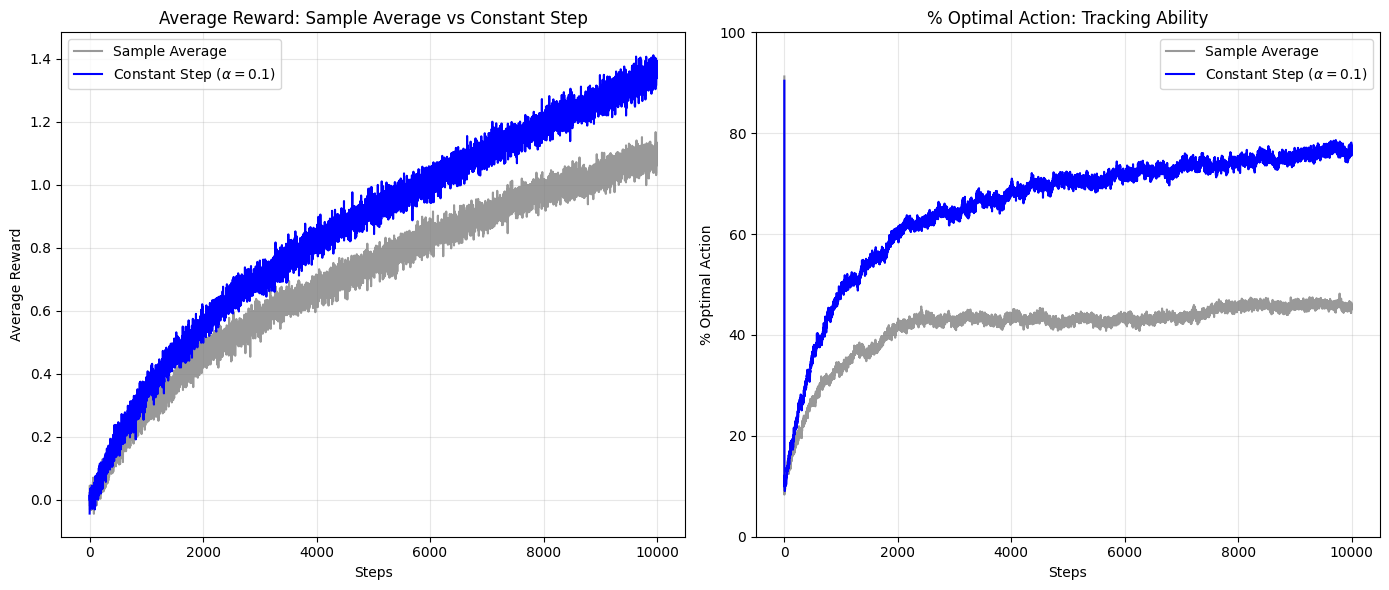

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(avg_rewards_sample, label='Sample Average', color='gray', alpha=0.8)
plt.plot(avg_rewards_const, label=r'Constant Step ($\alpha=0.1$)', color='blue')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(alpha=0.3)
plt.title('Average Reward: Sample Average vs Constant Step')


plt.subplot(1, 2, 2)
plt.plot(opt_pct_sample, label='Sample Average', color='gray', alpha=0.8)
plt.plot(opt_pct_const, label=r'Constant Step ($\alpha=0.1$)', color='blue')
plt.xlabel('Steps')
plt.ylabel('% Optimal Action')
plt.ylim(0, 100) 
plt.legend()
plt.grid(alpha=0.3)
plt.title('% Optimal Action: Tracking Ability')

plt.tight_layout()
plt.show()